## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# IRS Data

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
irs_data_df = pd.read_csv("Resources/IRSIncomeByZipCode.csv")
irs_data_df.head()

,index,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681


In [3]:
# View the data types
print(irs_data_df.dtypes)

index                                      int64
STATE                                     object
ZIPCODE                                    int64
Number of returns                          int64
Adjusted gross income (AGI)                int64
Avg AGI                                  float64
Number of returns with total income        int64
Total income amount                        int64
Avg total income                         float64
Number of returns with taxable income      int64
Taxable income amount                      int64
Avg taxable income                       float64
dtype: object


In [4]:
# Change the column name to merge
irs_data_df = irs_data_df.rename(columns={'ZIPCODE': 'ZipCode'})
irs_data_df.head()

,index,STATE,ZipCode,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681


# NYC Licensing Data

In [5]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
nyc_licensing_df = pd.read_csv("Resources/NYC_Dog_Licensing_Dataset_20240218.csv")
nyc_licensing_df.head()

C:\Users\sylhu\AppData\Local\Temp\ipykernel_17464\2823037151.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_licensing_df = pd.read_csv("Resources/NYC_Dog_Licensing_Dataset_20240218.csv")


,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465.0,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013.0,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028.0,09/12/2014,10/09/2017,2016


In [6]:
# View the data types
print(nyc_licensing_df.dtypes)

AnimalName             object
AnimalGender           object
AnimalBirthYear        object
BreedName              object
ZipCode               float64
LicenseIssuedDate      object
LicenseExpiredDate     object
Extract Year            int64
dtype: object


In [7]:
# Determine the number of unique values in each column.
nyc_licensing_df.nunique()

AnimalName            32083
AnimalGender              2
AnimalBirthYear          76
BreedName              1591
ZipCode                 911
LicenseIssuedDate      3337
LicenseExpiredDate     4869
Extract Year              5
dtype: int64

In [8]:
# Look at ZipCode value counts and create a DataFrame
# This DataFrame shows the zipcodes with the dog ownership
zipcode_types_count = nyc_licensing_df['ZipCode'].value_counts()
zipcode_types_count_df = pd.DataFrame(zipcode_types_count)

# Add an index column to the DataFrame
zipcode_types_count_df.reset_index(inplace=True)
zipcode_types_count_df.columns = ['ZipCode', 'Count']

zipcode_types_count_df.head()

,ZipCode,Count
0,10025.0,13819
1,10023.0,11189
2,11201.0,10907
3,11215.0,10849
4,10024.0,10581


In [9]:
# Convert float64 data to integers
zipcode_types_count_df['ZipCode'] = zipcode_types_count_df['ZipCode'].astype('int')
zipcode_types_count_df.head()

,ZipCode,Count
0,10025,13819
1,10023,11189
2,11201,10907
3,11215,10849
4,10024,10581


In [55]:
# # Export DataFrame to a CSV file
# zipcode_types_count_df.to_csv('zipcode_counts.csv', index=False)

# Filter IRS Data

In [10]:
# View the data types
irs_data_df.dtypes

index                                      int64
STATE                                     object
ZipCode                                    int64
Number of returns                          int64
Adjusted gross income (AGI)                int64
Avg AGI                                  float64
Number of returns with total income        int64
Total income amount                        int64
Avg total income                         float64
Number of returns with taxable income      int64
Taxable income amount                      int64
Avg taxable income                       float64
dtype: object

In [11]:
# Drop the non-beneficialcolumns
irs_data_df.drop(['index', 'Number of returns', 'Adjusted gross income (AGI)', 
                  'Avg AGI', 'Number of returns with taxable income', 'Taxable income amount',
                  'Avg taxable income'], axis=1, inplace=True)
irs_data_df.head()

,STATE,ZipCode,Number of returns with total income,Total income amount,Avg total income
0,AL,0,2022380,106420533,52.621433
1,AL,35004,4930,258024,52.337525
2,AL,35005,3300,129390,39.209091
3,AL,35006,1230,58585,47.630081
4,AL,35007,11990,651350,54.324437


In [15]:
# Filter the data by NY state
irs_ny_data_df = irs_data_df[irs_data_df['STATE'] == 'NY']

# Display the filtered data
irs_ny_data_df

,STATE,ZipCode,Number of returns with total income,Total income amount,Avg total income
15973,NY,0,9310480,723835791,77.744197
15974,NY,10001,13720,2127995,155.101676
15975,NY,10002,43410,2033619,46.846786
15976,NY,10003,29340,6229147,212.309032
15977,NY,10004,2580,904779,350.689535
...,...,...,...,...,...
17510,NY,14901,5420,190619,35.169557
17511,NY,14903,3640,211982,58.236813
17512,NY,14904,7180,251840,35.075209
17513,NY,14905,4340,279825,64.475806


In [16]:
# Convert float64 data to integers
irs_ny_data_df['ZipCode'] = irs_ny_data_df['ZipCode'].astype('int')
irs_ny_data_df.dtypes

C:\Users\sylhu\AppData\Local\Temp\ipykernel_17464\1315368963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irs_ny_data_df['ZipCode'] = irs_ny_data_df['ZipCode'].astype('int')


STATE                                   object
ZipCode                                  int32
Number of returns with total income      int64
Total income amount                      int64
Avg total income                       float64
dtype: object

# Merge IRS NY data with NYC Licensing Zip Code data

In [19]:
# Combine two csv files by using the ZipCode Column.
merged_df = pd.merge(irs_ny_data_df, zipcode_types_count_df, on='ZipCode', how='inner')
merged_df

,STATE,ZipCode,Number of returns with total income,Total income amount,Avg total income,Count
0,NY,0,9310480,723835791,77.744197,1
1,NY,10001,13720,2127995,155.101676,4747
2,NY,10002,43410,2033619,46.846786,5830
3,NY,10003,29340,6229147,212.309032,7073
4,NY,10004,2580,904779,350.689535,719
...,...,...,...,...,...,...
467,NY,14847,1130,53423,47.276991,1
468,NY,14850,22500,1634886,72.661600,5
469,NY,14882,1960,125690,64.127551,2
470,NY,14901,5420,190619,35.169557,3


In [23]:
# # Export DataFrame to a CSV file
merged_df.to_csv('merged_df.csv', index=False)

In [26]:
# Sort the DataFrame by the 'Count' column in descending order
count_sorted_df = merged_df.sort_values(by='Count', ascending=False)

# Print the sorted DataFrame
count_sorted_df

,STATE,ZipCode,Number of returns with total income,Total income amount,Avg total income,Count
22,NY,10025,46200,6184796,133.870043,13819
20,NY,10023,33900,10861855,320.408702,11189
187,NY,11201,29680,5197678,175.123922,10907
200,NY,11215,34930,3965200,113.518466,10849
21,NY,10024,30820,9317798,302.329591,10581
...,...,...,...,...,...,...
349,NY,11783,10930,965422,88.327722,1
348,NY,11782,7990,727810,91.090113,1
345,NY,11778,6080,424950,69.893092,1
342,NY,11768,10870,1479367,136.096320,1


In [27]:
# # Export DataFrame to a CSV file
count_sorted_df.to_csv('count_sorted_df.csv', index=False)

# Analyze Data - Review Graphs & Correlations

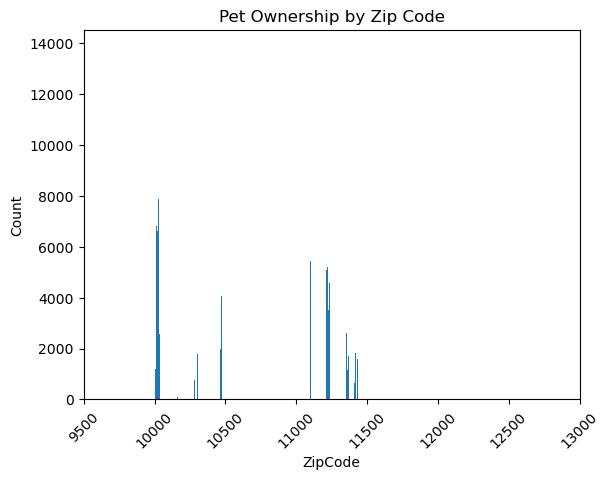

In [34]:
# Create bar chart
plt.bar(merged_df['ZipCode'], merged_df['Count'])

# Adding labels and title
plt.xlabel('ZipCode')
plt.ylabel('Count')
plt.title('Pet Ownership by Zip Code')

# Set x-axis limits
plt.xlim(9500, 13000)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

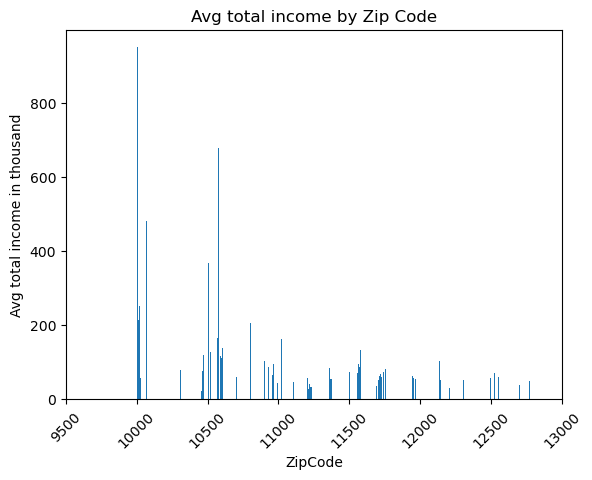

In [35]:
# Create bar chart
plt.bar(merged_df['ZipCode'], merged_df['Avg total income'])

# Adding labels and title
plt.xlabel('ZipCode')
plt.ylabel('Avg total income in thousand')
plt.title('Avg total income by Zip Code')

# Set x-axis limits
plt.xlim(9500, 13000)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

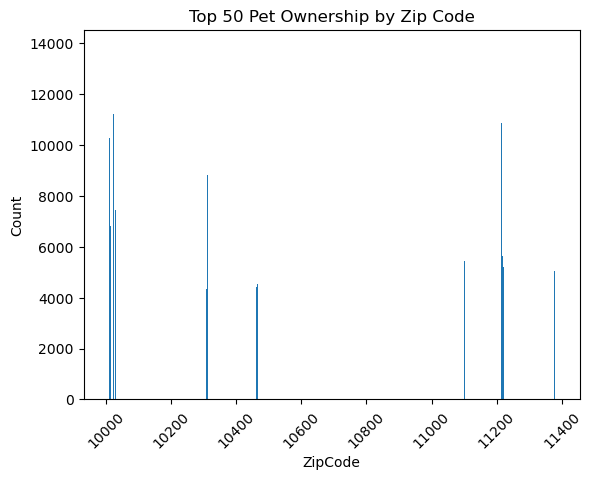

In [25]:
# Sort the DataFrame by the 'Count' column in descending order and select the top 50 rows
top_50_df = merged_df.sort_values(by='Count', ascending=False).head(50)

# Create bar chart with top 50 values
plt.bar(top_50_df['ZipCode'], top_50_df['Count'])

# Adding labels and title
plt.xlabel('ZipCode')
plt.ylabel('Count')
plt.title('Top 50 Pet Ownership by Zip Code')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

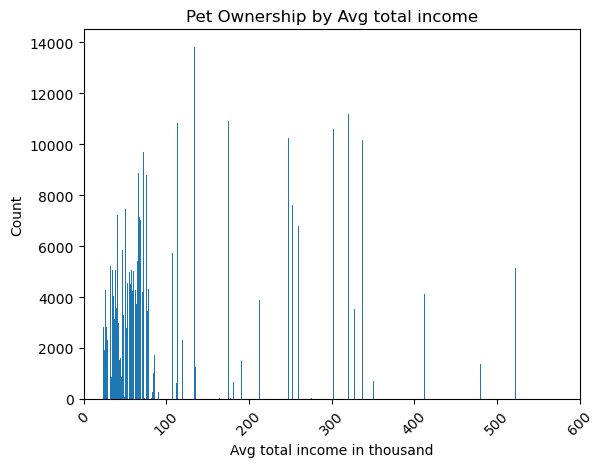

In [42]:
# Create bar chart
plt.bar(merged_df['Avg total income'], merged_df['Count'])

# Adding labels and title
plt.xlabel('Avg total income in thousand')
plt.ylabel('Count')
plt.title('Pet Ownership by Avg total income')

# Set x-axis limits
plt.xlim(0, 600)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [40]:
# Calculate the correlation between the avg total income and count
correlation = merged_df['Avg total income'].corr(merged_df['Count'])
print(correlation)

0.09946184814265059


In [43]:
# Calculate the correlation between the zipcode and count
correlation_zipcode = merged_df['ZipCode'].corr(merged_df['Count'])
print(correlation_zipcode)

-0.36407185632413946


# Machine Learning Data Preparation

In [47]:
# Look at ZipCode value counts for binning
nyc_zipcode_count = nyc_licensing_df['ZipCode'].value_counts()
nyc_zipcode_count

ZipCode
10025.0    13819
10023.0    11189
11201.0    10907
11215.0    10849
10024.0    10581
           ...  
6851.0         1
10964.0        1
13903.0        1
10576.0        1
11952.0        1
Name: count, Length: 911, dtype: int64

In [51]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
nyc_zipcode_count_replace = list(nyc_zipcode_count[nyc_zipcode_count <= 1].index)

# Replace in dataframe
for x in nyc_zipcode_count_replace:
    nyc_licensing_df['ZipCode'] = nyc_licensing_df['ZipCode'].replace(x,"Other")

# Check to make sure binning was successful
nyc_licensing_df['ZipCode'].value_counts()

ZipCode
Other    616881
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classificatin_counts_over_1 = classification_count[classification_count > 1]
classificatin_counts_over_1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < 1800].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_data = pd.get_dummies(application_df)
numeric_data.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [10]:
# Split our preprocessed data into our features and target arrays
y = numeric_data["IS_SUCCESSFUL"]
X = numeric_data.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Attempt #1
# layer1 = 10 : activation function = relu
# layer2 = 20 : activation function = relu

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 20


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                440       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 681 (2.66 KB)
Trainable params: 681 (2.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100


804/804 [==============================] - 1s 778us/step - loss: 0.5871 - accuracy: 0.7077
Epoch 2/100
804/804 [==============================] - 1s 758us/step - loss: 0.5625 - accuracy: 0.7251
Epoch 3/100
804/804 [==============================] - 1s 726us/step - loss: 0.5579 - accuracy: 0.7292
Epoch 4/100
804/804 [==============================] - 1s 734us/step - loss: 0.5552 - accuracy: 0.7300
Epoch 5/100
804/804 [==============================] - 1s 772us/step - loss: 0.5538 - accuracy: 0.7297
Epoch 6/100
804/804 [==============================] - 1s 754us/step - loss: 0.5529 - accuracy: 0.7307
Epoch 7/100
804/804 [==============================] - 1s 730us/step - loss: 0.5524 - accuracy: 0.7318
Epoch 8/100
804/804 [==============================] - 1s 738us/step - loss: 0.5515 - accuracy: 0.7313
Epoch 9/100
804/804 [==============================] - 1s 732us/step - loss: 0.5511 - accuracy: 0.7324
Epoch 10/100
804/804 [==============================] - 1s 738us/step -

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5530 - accuracy: 0.7270 - 671ms/epoch - 3ms/step
Loss: 0.553019106388092, Accuracy: 0.7269970774650574


In [16]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')

C:\Users\sylhu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
